In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D,BatchNormalization,Dropout

In [14]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'archive/trainingSample/trainingSample',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(28, 28),
    color_mode='grayscale',  # Load images as grayscale
    validation_split=0.2,
    subset="training",
    seed=123
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory=r'archive/trainingSample/trainingSample',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(28, 28),
    color_mode='grayscale',  # Load images as grayscale
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 600 files belonging to 10 classes.
Using 480 files for training.
Found 600 files belonging to 10 classes.
Using 120 files for validation.


In [15]:
def process_input(image,label):
    image = tf.cast(image/255.0,tf.float32)
    return image,label

train_ds = train_ds.map(process_input)
valid_ds  = valid_ds.map(process_input)

In [114]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


# Flatten the output for the Dense layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# Output Layer (10 classes for MNIST, with softmax activation)
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,034 (910.29 KB)

 Trainable params: 232,842 (909.54 KB)

 Non-trainable params: 192 (768.00 B)

In [115]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [118]:
history  = model.fit(train_ds,epochs = 30 ,validation_data = valid_ds )

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.2583 - val_loss: 2.1655
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9984 - loss: 0.0107 - val_accuracy: 0.3000 - val_loss: 1.9469
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9989 - loss: 0.0058 - val_accuracy: 0.4000 - val_loss: 1.6670
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9997 - loss: 0.0051 - val_accuracy: 0.4917 - val_loss: 1.4131
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9982 - loss: 0.0095 - val_accuracy: 0.6333 - val_loss: 1.0821
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.7167 - val_loss: 0.8455
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 0.8167 - val_loss: 0.6505
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8417 - v

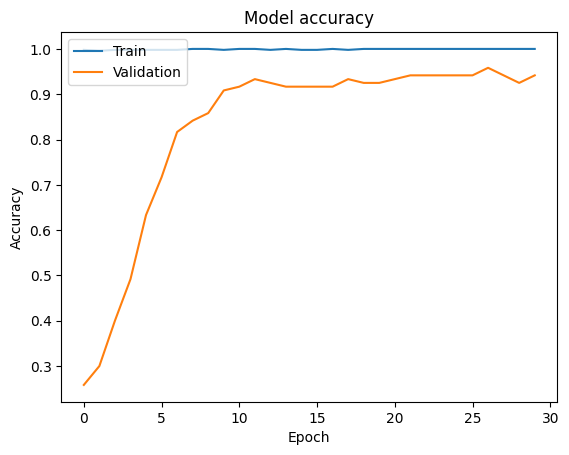

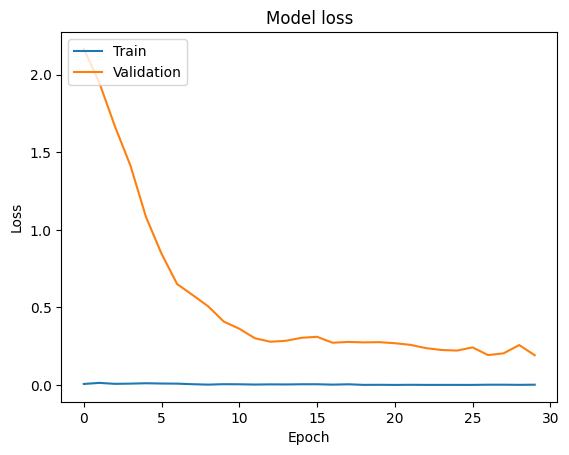

In [119]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


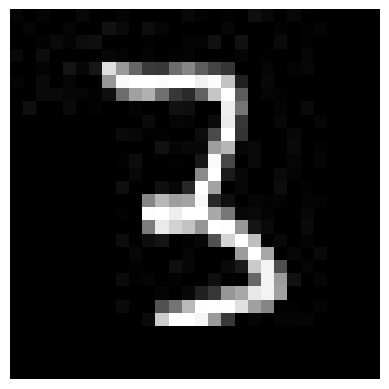

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: 3


In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
test_img = cv2.imread(r'archive\testSample\img_176.jpg')
# Check if the image was loaded correctly
if test_img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to grayscale
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    test_img_resized = cv2.resize(test_img_gray, (28, 28))

    # Normalize the image to [0, 1]
    test_img_normalized = test_img_resized / 255.0

    # Add batch dimension and channel dimension
    test_img_input = np.expand_dims(test_img_normalized, axis=(0, -1))

    # Display the preprocessed image
    plt.imshow(test_img_input[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the prediction
    print(f"Predicted class: {predicted_class}")
